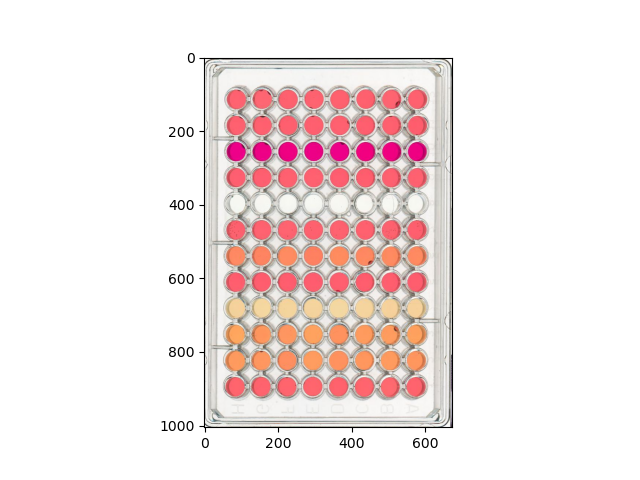

In [12]:
%matplotlib widget

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.draw
from image_processing import file_finder_service, image_display

well_plate_path = file_finder_service.find_training_image("wellplate-01.jpg")
well_plate = image = iio.imread(uri=well_plate_path)

# Display the image
fig, ax = plt.subplots()
ax.imshow(well_plate)

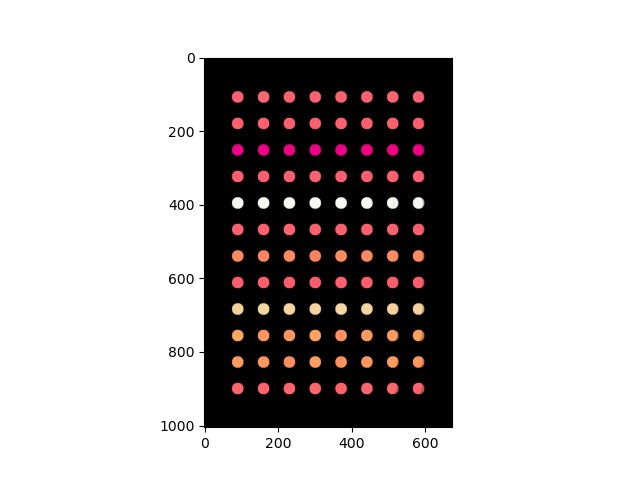

In [14]:
well_plate_centers_path = file_finder_service.find_training_image("centers.txt")

centers = np.loadtxt(well_plate_centers_path, delimiter=" ")
mask = np.ones(shape=well_plate.shape[:2], dtype=bool)

for cx, ry in centers:
    rr, cc = skimage.draw.disk(center=(ry, cx), radius=16, shape=well_plate.shape[:2])
    mask[rr, cc] = False

well_plate[mask] = 0


fig, ax = plt.subplots()
ax.imshow(well_plate)
